**This notebook is about**:
* Trying out the UK Open Data API
* Requesting data on corona virus from [GOV.UK Coronavirus(COVID-19) Open Data API](https://coronavirus.data.gov.uk/details/developers-guide/main-api)
* Doing some pretty quick and dirty data exploration
* Getting some simple statistics
* Visualising the results

### Visual Summaries in this notebook
* Regional Yearly Tally of Covid-19 Cases
* Nation-wide monthly Tally of Covid-19 Cases
* Daily Variation in the number of Covid-19 Cases
* Aggregate Tally of Covid-19 Cases by Region
* Pie Chart representing Aggregate Tally of Covid-19 Cases by Region

In [8]:
from api import get_paginated_dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import seaborn as sns
import warnings

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
warnings.filterwarnings('ignore')

In [4]:
query_filters = [f'areaType=region']
query_structure = {"date": "date",
                   "name": "areaName",
                   "code": "areaCode",
                   "daily": "newCasesBySpecimenDate",
                   "cumulative": "cumCasesBySpecimenDate"
                  }

#### Get the data in json

In [5]:
json_data = get_paginated_dataset(query_filters, query_structure)

In [6]:
print(f'Length: {len(json_data)}')
print(f'Data (first 3 items):\n{json_data[:3]}')

Length: 12190
Data (first 3 items):
[{'date': '2023-10-24', 'name': 'North West', 'code': 'E12000002', 'daily': 77, 'cumulative': 2864615}, {'date': '2023-10-23', 'name': 'North West', 'code': 'E12000002', 'daily': 150, 'cumulative': 2864538}, {'date': '2023-10-22', 'name': 'North West', 'code': 'E12000002', 'daily': 111, 'cumulative': 2864388}]


**Save the data to disk**

In [9]:
with open('./data/data.json', 'wt') as f:
    json.dump(json_data, f)

**Load and analyse data**

**Read the data from disk and create a DataFrame**

In [10]:
df = pd.read_json('./data/data.json').set_index('date')
print(df.shape)
df.head()

(12190, 4)


,name,code,daily,cumulative
date,,,,
2023-10-24,North West,E12000002,77,2864615
2023-10-23,North West,E12000002,150,2864538
2023-10-22,North West,E12000002,111,2864388
2023-10-21,North West,E12000002,97,2864277
2023-10-20,North West,E12000002,164,2864180


In [11]:
print(type(df.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


**Create columns for year, month and day**

In [12]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df.head()

,name,code,daily,cumulative,year,month,day
date,,,,,,,
2023-10-24,North West,E12000002,77,2864615,2023,10,24
2023-10-23,North West,E12000002,150,2864538,2023,10,23
2023-10-22,North West,E12000002,111,2864388,2023,10,22
2023-10-21,North West,E12000002,97,2864277,2023,10,21
2023-10-20,North West,E12000002,164,2864180,2023,10,20


In [13]:
df.rename(columns = {'name': 'region'}, inplace = True)      
df.head()

,region,code,daily,cumulative,year,month,day
date,,,,,,,
2023-10-24,North West,E12000002,77,2864615,2023,10,24
2023-10-23,North West,E12000002,150,2864538,2023,10,23
2023-10-22,North West,E12000002,111,2864388,2023,10,22
2023-10-21,North West,E12000002,97,2864277,2023,10,21
2023-10-20,North West,E12000002,164,2864180,2023,10,20


In [14]:
print(df.code.nunique())
print(df.region.nunique())

9
9


## Regional Yearly Tally

In [15]:
regional_yearly = df.groupby(['region', 'year'])['daily'].sum().unstack()
regional_yearly.head()

year,2020,2021,2022,2023
region,,,,
East Midlands,196447,824623,722122,47847
East of England,216743,1021087,1007072,58594
London,422965,1532910,1163020,56973
North East,130128,458160,440308,28607
North West,388456,1355569,1049646,70944


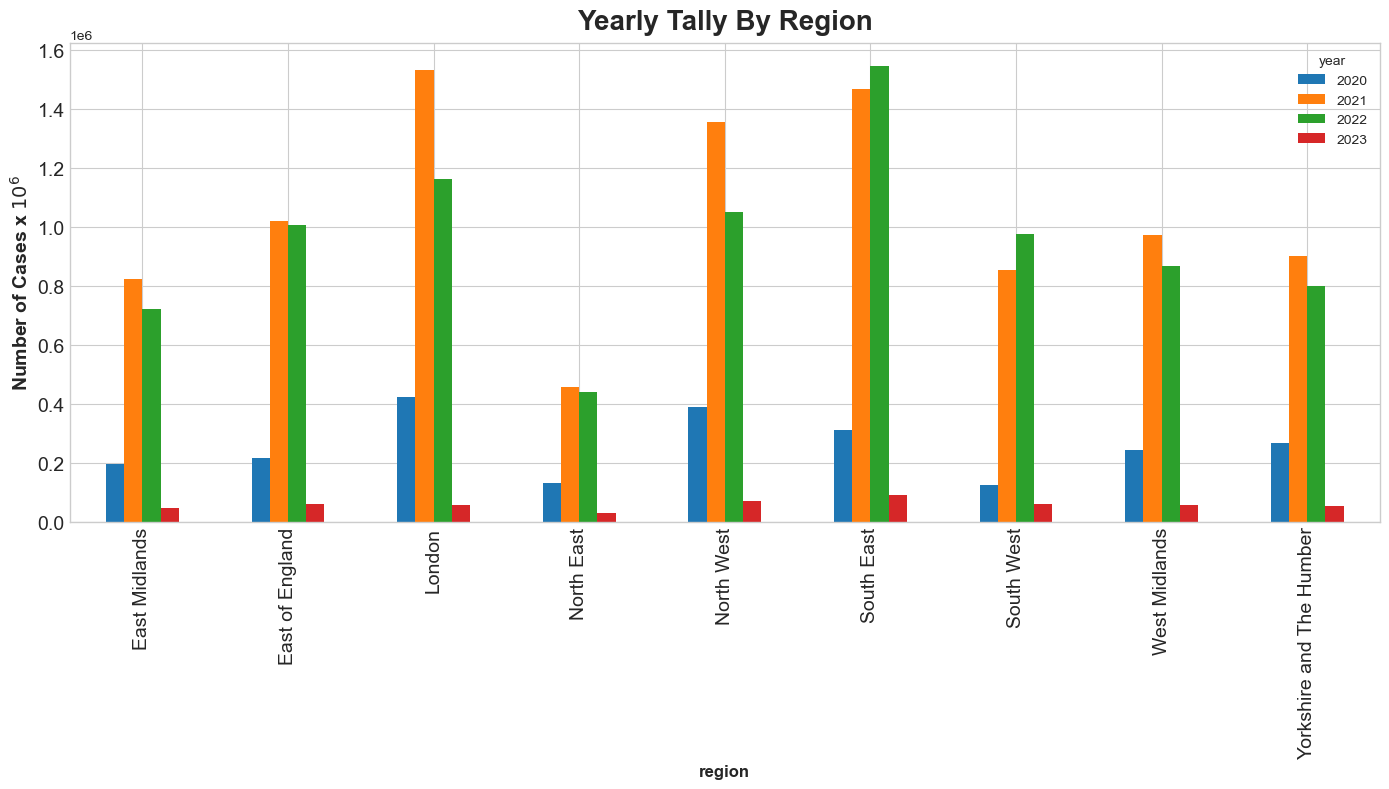

In [18]:
regional_yearly.plot(kind = 'bar', figsize = (14, 8), fontsize = 14)
plt.title('Yearly Tally By Region', fontsize = 20)
plt.ylabel('Number of Cases x $10^6$', fontsize = 14)
plt.show()

The chart shows that: 
* **All regions were at peak period in 2021**
* The **least** affected region is **North East**

### Nation-wide monthly Tally

In [19]:
regional_monthly = df.groupby(['year', 'month'])['daily'].sum().unstack()
regional_monthly.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
regional_monthly.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2020,1.0,54.0,31528.0,112508.0,66905.0,25202.0,19211.0,30064.0,127351.0,485065.0,531897.0,871682.0
2021,1101254.0,301061.0,141040.0,62829.0,64408.0,302943.0,950643.0,796032.0,776226.0,1067889.0,1024853.0,2805130.0
2022,3194643.0,1097133.0,1774998.0,649752.0,198242.0,382530.0,522816.0,149220.0,147954.0,211390.0,91029.0,155638.0
2023,81020.0,94344.0,116596.0,51215.0,31827.0,13012.0,14076.0,30814.0,53167.0,38756.0,NaN,NaN


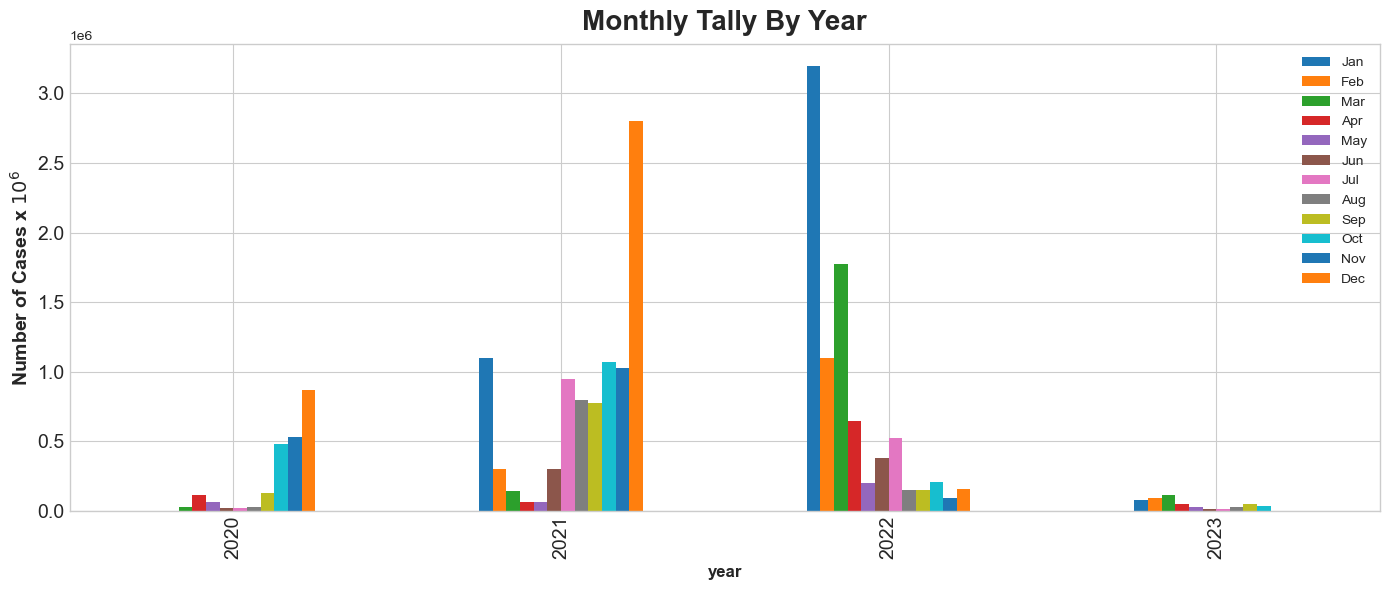

In [20]:
regional_monthly.plot(kind = 'bar', figsize = (14, 6), fontsize = 14)
plt.title('Monthly Tally By Year', fontsize = 20)
plt.ylabel('Number of Cases x $10^6$', fontsize = 14)
plt.show()

* The disproportionate high cases in **December 2021 - January 2022** is due to the outbreak of the **omicron** variant. 
* There was a **general decline** in the number of cases in **Feb 2022** followed by a sudden rise in **March 2022**.
* There has been a significant drop in the number of infection since **`August 31, 2022`** with a drastic drop in **`November and December 2022`**.

**Considering the degree of penetration of the diesease, it is highly likely that most of the positive test results in 2023 are `false positives` (FP). It is therefore highly recommended that mandatory tests should be halted! Tests should only be conducted on patients and probably only in hospitals.**

#### Daily Variation in the number of cases

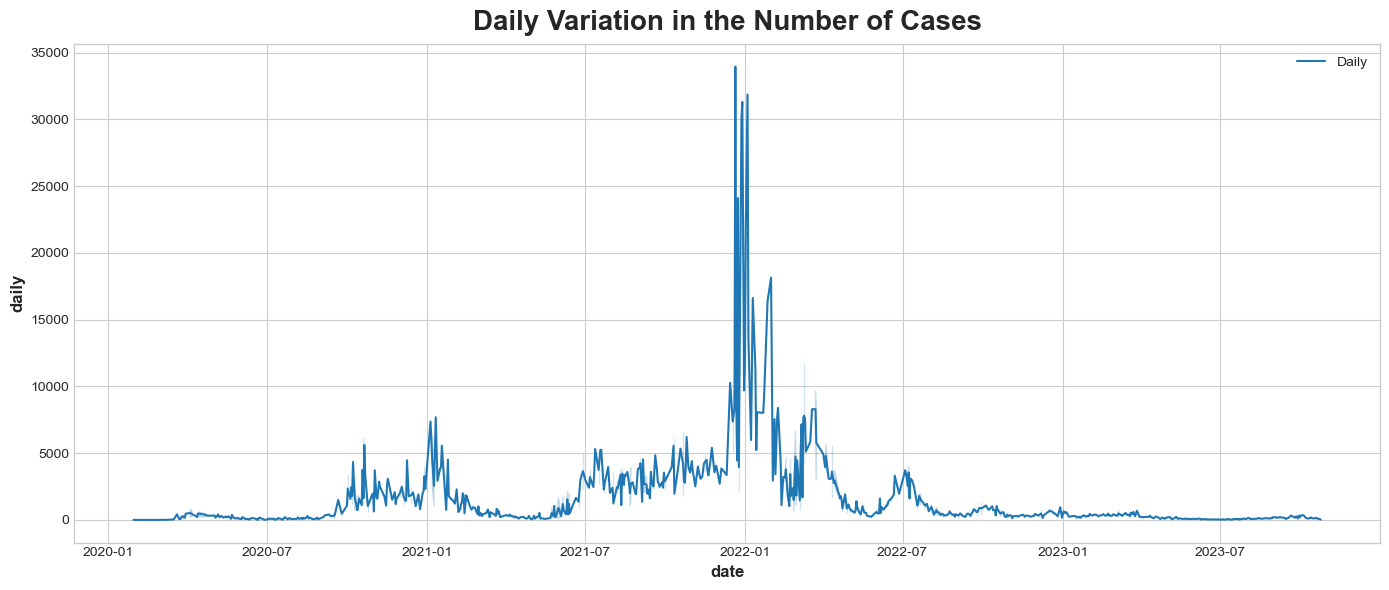

In [22]:
plt.figure(figsize = (14, 6))
sns.lineplot(data = df.daily.sample(1000), label = 'Daily')
plt.title('Daily Variation in the Number of Cases', fontsize = 20)
plt.show()

**The daily statistics agrees with the monthly tally above with spikes in the periods `December - January` which saw the outbreak of `Delta`and `Omicron`variants respectively**. 

#### The infection rate has dropped significantly as of `November 30, 2022`

### Aggregate Tally by Region
This actually recreates the column **`cumulative`** in the data!

In [29]:
regional_agg = df.groupby(['region'])['daily'].sum().sort_values(ascending = False).to_frame()
regional_agg

,daily
region,
South East,3422639
London,3175868
North West,2864615
East of England,2303496
West Midlands,2142973
Yorkshire and The Humber,2022350
South West,2015765
East Midlands,1791039
North East,1057203


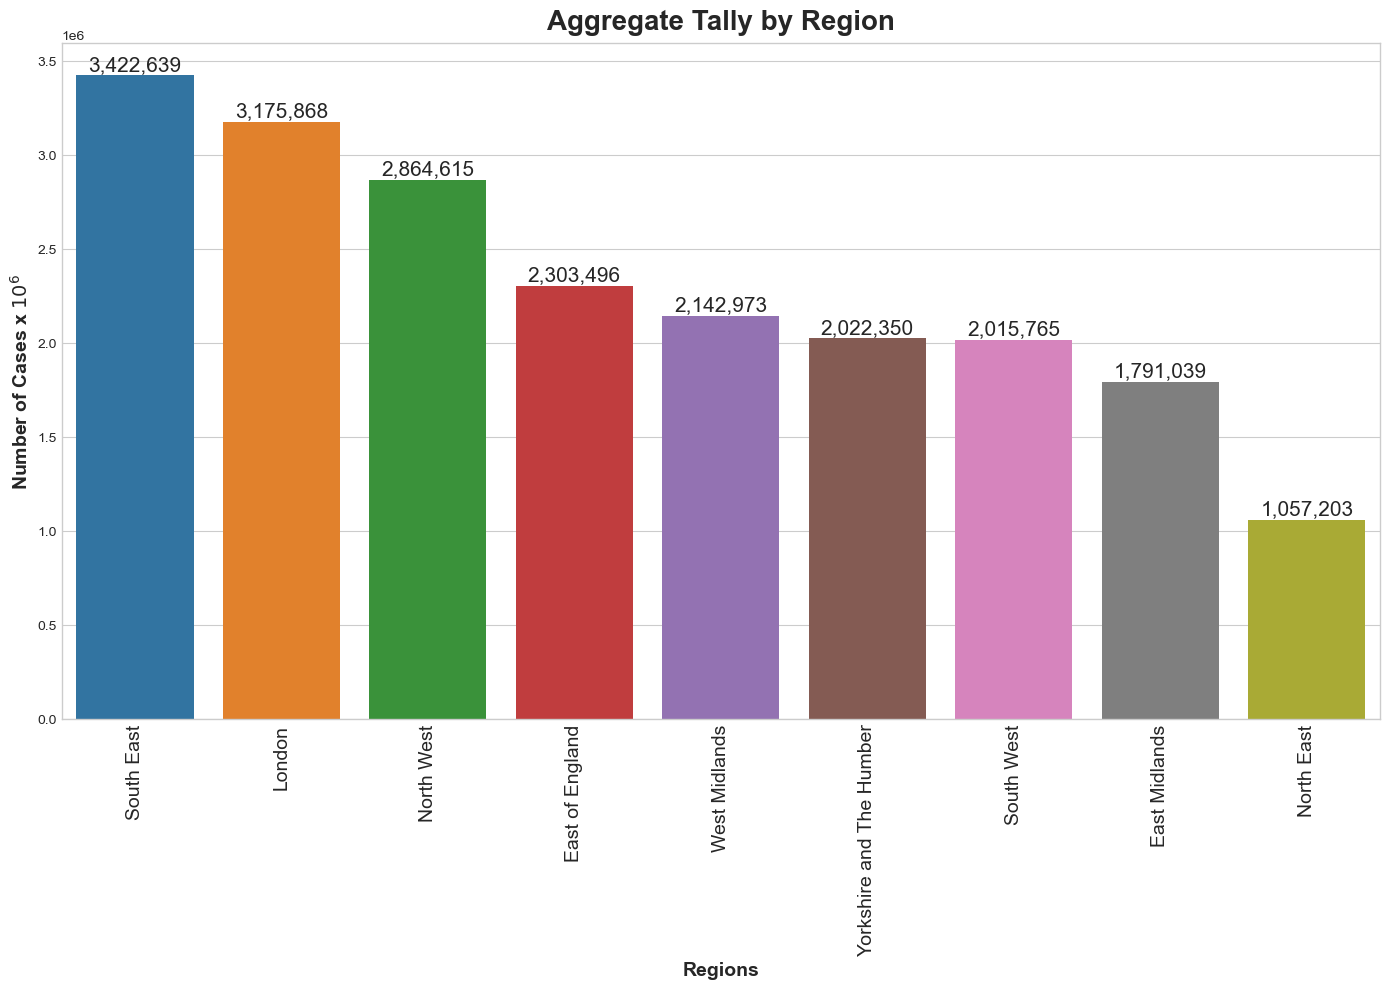

In [31]:
plt.figure(figsize = (14, 10))
plots = sns.barplot(x = regional_agg.index, y = regional_agg.daily)
for bar in plots.patches:
    plots.annotate(f'{bar.get_height():,.0f}',
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),    
                   ha = 'center', va = 'center',
                   size = 15, xytext = (0, 8),
                   textcoords = 'offset points')
plt.title('Aggregate Tally by Region', fontsize = 20)
plt.ylabel('Number of Cases x $10^6$', fontsize = 14)
plt.xlabel('Regions', fontsize = 14)
plt.xticks(rotation = 90, fontsize = 14)
plt.show()

**As can be seen on the Pareto chart, North East, the least hit region, is certain doing something different which is worth emulating...!!**

### Pie Chart representing same information as above

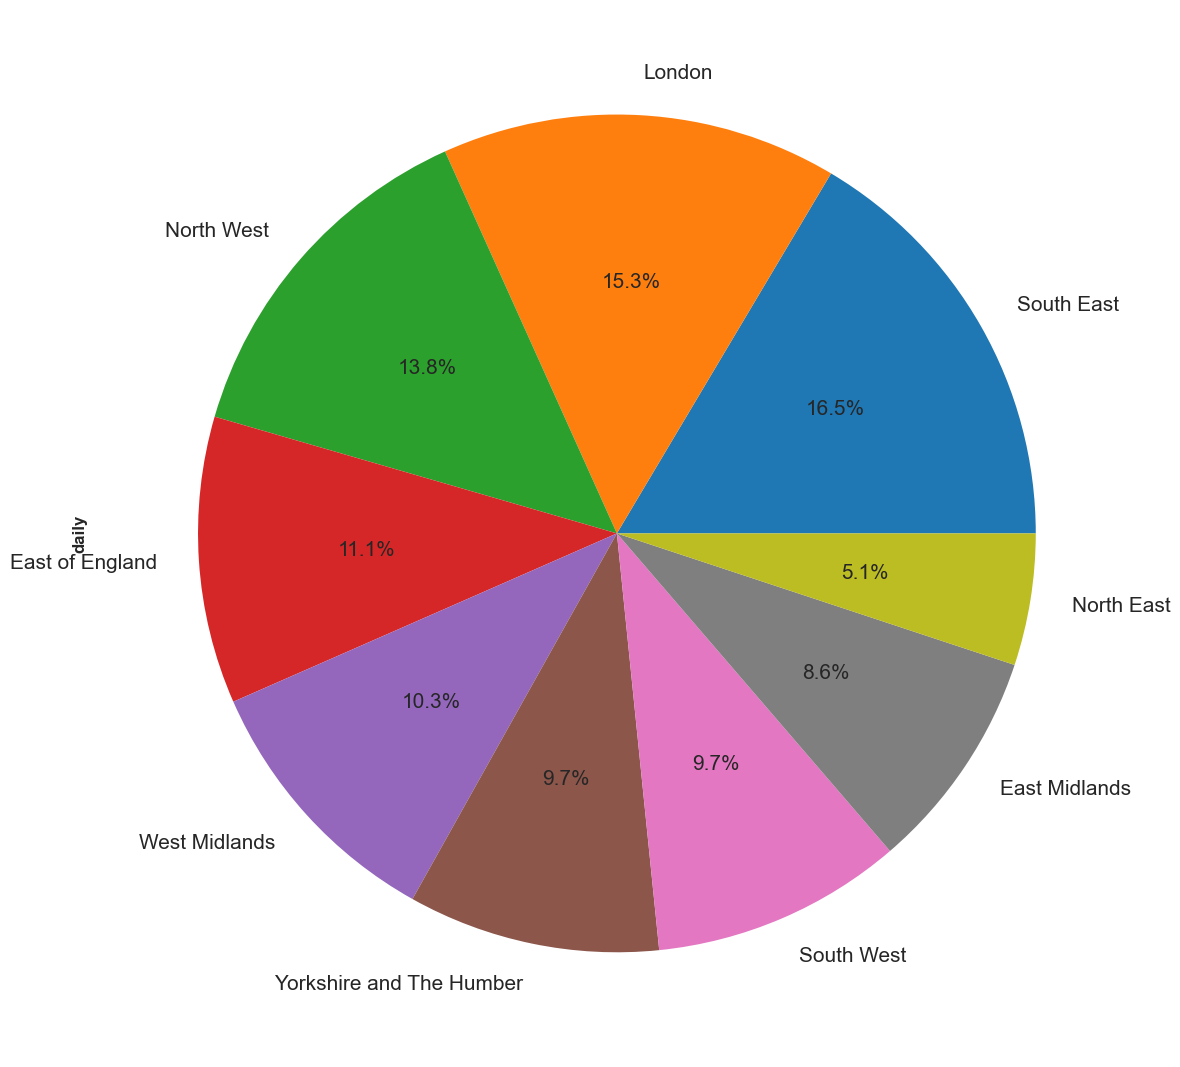

In [26]:
regional_agg.plot(kind = 'pie', subplots = True, figsize = (12, 12), autopct = '%1.1f%%', fontsize = 15)
plt.show()

**`South East`, `London` and `North West` are highly hit with `South East` being the most hit region as of `Octoberber 31, 2023`**. 